=== TİTANİC VERİ SETİ MAKİNE ÖĞRENMESİ MODELİ ===

1. Veri Yükleniyor...
Veri seti boyutu: (891, 15)
Sütunlar: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

--- Veri Seti Bilgileri ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  em

Destek Vektör Makinesi    0.8286       0.0341        0.8300        0.0339         0.0014    
   En iyi parametreler: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
   Kararlılık değişimi: Daha Kararlı (Std: 0.0341 → 0.0339)

🔧 K-En Yakın Komşu optimize ediliyor...
K-En Yakın Komşu          0.8034       0.0301        0.8118        0.0256         0.0084    
   En iyi parametreler: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
   Kararlılık değişimi: Daha Kararlı (Std: 0.0301 → 0.0256)

🔧 Lojistik Regresyon optimize ediliyor...
Lojistik Regresyon        0.8005       0.0274        0.8020        0.0248         0.0014    
   En iyi parametreler: {'C': 0.1, 'max_iter': 1000, 'solver': 'lbfgs'}
   Kararlılık değişimi: Daha Kararlı (Std: 0.0274 → 0.0248)

🚀 En çok iyileşen model: K-En Yakın Komşu (+0.0084)

8. Final Model Değerlendirmesi...
🏆 Final En İyi Model: K-En Yakın Komşu
📈 Final Model Doğruluğu: 0.7989 (79.89%)

--- İlk 10 Tahmin Karşılaştırması ---
     Gerçek  Tahmin
56

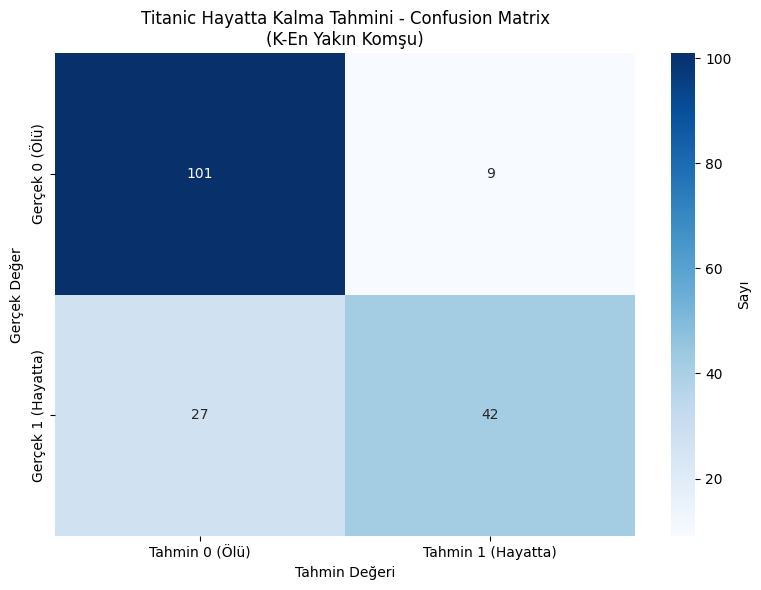


--- Detaylı Performans Raporu ---
              precision    recall  f1-score   support

         Ölü     0.7891    0.9182    0.8487       110
     Hayatta     0.8235    0.6087    0.7000        69

    accuracy                         0.7989       179
   macro avg     0.8063    0.7634    0.7744       179
weighted avg     0.8023    0.7989    0.7914       179


9.1. Özellikler Arası Korelasyon Analizi...
--- En Yüksek Korelasyonlar (survived ile) ---
sex_male       : -0.5434 (Negatif korelasyon)
pclass         : -0.3385 (Negatif korelasyon)
fare           :  0.2573 (Pozitif korelasyon)
embarked_S     : -0.1557 (Negatif korelasyon)
age            : -0.0707 (Negatif korelasyon)
embarked_U     :  0.0601 (Pozitif korelasyon)
family_size    :  0.0166 (Pozitif korelasyon)
embarked_Q     :  0.0037 (Pozitif korelasyon)


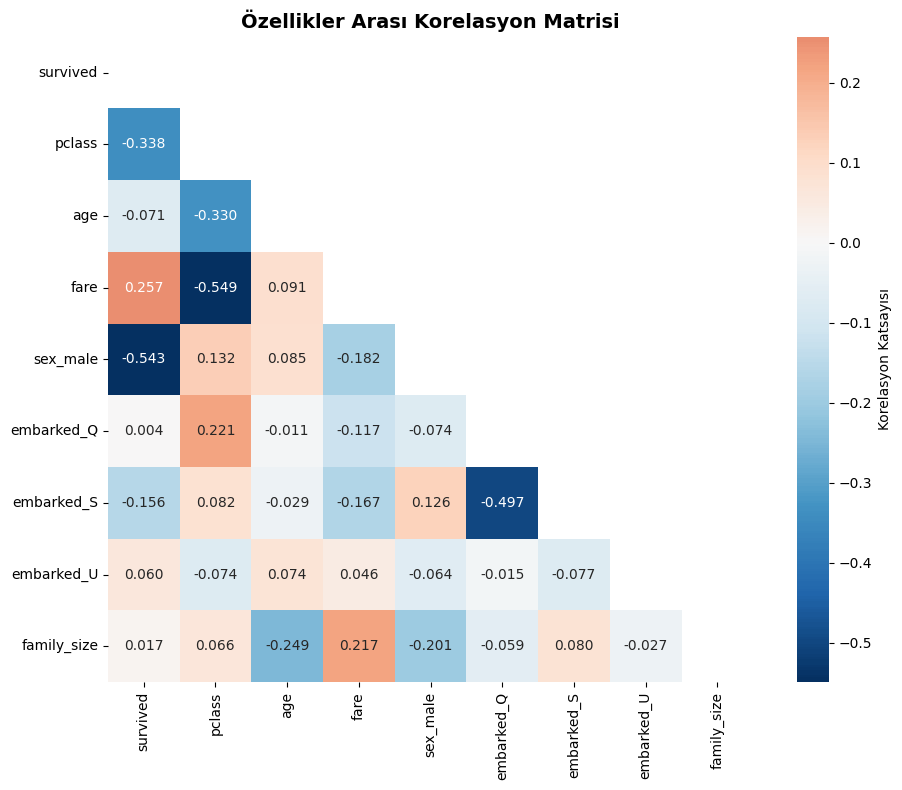


Korelasyon heatmap gösterildi. Survived ile en güçlü korelasyona sahip özellikler:
1. sex_male: -0.5434
2. pclass: -0.3385
3. fare: 0.2573

10. Özellik Önemleri Analizi...
--- Özellik Önemleri Tablosu (Lojistik Regresyon Katsayıları) ---
Sıra Özellik         Katsayı    Mutlak Önem  Etki                
-----------------------------------------------------------------
1    sex_male        -1.1432    1.1432       Azaltır ❌           
2    pclass          -0.7788    0.7788       Azaltır ❌           
3    age             -0.4176    0.4176       Azaltır ❌           
4    family_size     -0.2179    0.2179       Azaltır ❌           
5    embarked_S      -0.1791    0.1791       Azaltır ❌           
6    fare            0.1406     0.1406       Artırır ✅           
7    embarked_U      0.0941     0.0941       Artırır ✅           
8    embarked_Q      0.0639     0.0639       Artırır ✅           

📊 Özellik Yorumları:
• En etkili özellik: sex_male (Katsayı: -1.1432)

🔝 En Önemli 3 Özellik:
   1. 

In [1]:
# Gerekli Kütüphaneleri İçe Aktarma
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.exceptions import ConvergenceWarning

# Uyarıları gizle
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# 1. VERİ YÜKLEMESİ VE İLK İNCELEME
print("=== TİTANİC VERİ SETİ MAKİNE ÖĞRENMESİ MODELİ ===")
print("\n1. Veri Yükleniyor...")

# Titanic veri setini yükle
df_tit = sns.load_dataset("titanic")
df_tit_c = df_tit.copy()

print(f"Veri seti boyutu: {df_tit_c.shape}")
print(f"Sütunlar: {list(df_tit_c.columns)}")

# Veri seti hakkında genel bilgi
print("\n--- Veri Seti Bilgileri ---")
print(df_tit_c.info())

print("\n--- İstatistiksel Özet ---")
print(df_tit_c.describe().T)

# 2. EKSİK DEĞER KONTROLÜ
print("\n2. Eksik Değer Analizi...")
print("--- Eksik Değerler ---")
print(df_tit_c.isnull().sum())

# 3. VERİ TEMİZLEME VE ÖN İŞLEME
print("\n3. Veri Temizleme İşlemleri...")

# Gereksiz sütunları kaldır
columns_to_drop = ["embark_town", "who", "adult_male", "deck", "alive", "alone", "class"]
df_tit_c = df_tit_c.drop(columns_to_drop, axis=1)
print(f"Kaldırılan sütunlar: {columns_to_drop}")

# Eksik değerleri doldur
df_tit_c["age"] = df_tit_c["age"].fillna(round(df_tit_c["age"].mean()))
df_tit_c["embarked"] = df_tit_c["embarked"].fillna(value="U")  # U = Unknown

print("Eksik değerler doldurulduktan sonra:")
print(df_tit_c.isnull().sum())

# One-Hot Encoding
df_tit_c = pd.get_dummies(df_tit_c, columns=["sex", "embarked"], drop_first=True, dtype=int)

# Feature Engineering - Aile büyüklüğü hesapla
df_tit_c["family_size"] = df_tit_c["sibsp"] + df_tit_c["parch"] + 1  # +1 kendisi için

# Sibsp ve parch sütunlarını kaldır
df_tit_c = df_tit_c.drop(["sibsp", "parch"], axis=1)

print(f"\n✅ Feature Engineering tamamlandı:")
print(f"- family_size sütunu oluşturuldu (sibsp + parch + 1)")
print(f"- sibsp ve parch sütunları kaldırıldı")
print(f"One-Hot Encoding + Feature Engineering sonrası sütunlar: {list(df_tit_c.columns)}")

# 4. VERİYİ EĞİTİM VE TEST OLARAK AYIRMA
print("\n4. Veri Ayrımı (Eğitim/Test)...")

# Girdi ve hedef değişkenleri ayır
X = df_tit_c.drop("survived", axis=1)
y = df_tit_c["survived"]

# Eğitim ve test setlerini ayır
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

print(f"Eğitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")

# 4.1. ÖZELLİK ÖLÇEKLEMESİ (FEATURE SCALING)
print("\n4.1. Özellik Ölçeklemesi...")

# StandardScaler ile özellikleri ölçekle
scaler = StandardScaler()

# Sadece eğitim seti ile scaler'ı fit et (data leakage'ı önlemek için)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame formatına geri çevir
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("Ölçekleme öncesi istatistikler (Train seti):")
print(X_train.describe())

print("\nÖlçekleme sonrası istatistikler (Train seti):")
print(X_train_scaled.describe())

print(f"✅ Özellikler StandardScaler ile ölçeklenmiştir (Ortalama≈0, Std≈1)")

# 5. FARKLI SINIFLANDIRMA MODELLERİNİ TEST ETME
print("\n5. Farklı Sınıflandırma Modelleri Test Ediliyor...")

# Farklı modelleri tanımla
models = {
    'Lojistik Regresyon': LogisticRegression(max_iter=10000, solver="liblinear"),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Karar Ağacı': DecisionTreeClassifier(random_state=42),
    'K-En Yakın Komşu': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Destek Vektör Makinesi': SVC(kernel='rbf', random_state=42)
}

# Hangi modellerin ölçekleme gerektirdiğini belirle
scaling_required_models = ['Lojistik Regresyon', 'K-En Yakın Komşu', 'Destek Vektör Makinesi']
tree_based_models = ['Random Forest', 'Karar Ağacı']  # Ağaç tabanlı modeller ölçekleme gerektirmez

# Model performanslarını sakla
model_results = {}
trained_models = {}

print("Model performansları:")
print("-" * 50)

for name, model in models.items():
    # Ölçekleme gerektiren modeller için scaled veri kullan
    if name in scaling_required_models:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
        scaling_info = "(Scaled)"
    else:
        X_train_use = X_train
        X_test_use = X_test
        scaling_info = "(Original)"
    
    # Modeli eğit
    model.fit(X_train_use, y_train)
    
    # Tahmin yap
    y_pred = model.predict(X_test_use)
    
    # Doğruluk hesapla
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = accuracy
    trained_models[name] = model
    
    print(f"{name:<25}: {accuracy:.4f} ({accuracy*100:.2f}%) {scaling_info}")

# En iyi modeli bul
best_model_name = max(model_results, key=model_results.get)
best_model = trained_models[best_model_name]
print(f"\n🏆 En İyi Model: {best_model_name} - Doğruluk: {model_results[best_model_name]:.4f}")

# En iyi modelle final tahminleri yap
if best_model_name in scaling_required_models:
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

# 6. CROSS VALIDATION İLE MODEL DEĞERLENDİRMESİ
print("\n6. Cross Validation ile Model Değerlendirmesi...")

# StratifiedKFold CV tanımla (sınıf dengesini korur)
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# CV skorları için veri yapısı
cv_results = {}
train_test_comparison = {}

print("Cross Validation Sonuçları (Özet):")
print("-" * 80)
print(f"{'Model':<25} {'CV Ort.':<10} {'CV Std':<10} {'Train':<10} {'Test':<10} {'Fark':<10}")
print("-" * 80)

for name, model in models.items():
    # Ölçekleme gerektiren modeller için scaled veri kullan
    if name in scaling_required_models:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test
    
    # Cross validation skorları hesapla
    cv_scores = cross_val_score(model, X_train_use, y_train, cv=cv_strategy, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Train ve test performansı
    model.fit(X_train_use, y_train)
    train_score = model.score(X_train_use, y_train)
    test_score = model.score(X_test_use, y_test)
    score_diff = train_score - test_score
    
    # Sonuçları kaydet
    cv_results[name] = {
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'cv_scores': cv_scores
    }
    
    train_test_comparison[name] = {
        'train': train_score,
        'test': test_score,
        'diff': score_diff
    }
    
    print(f"{name:<25} {cv_mean:<10.4f} {cv_std:<10.4f} {train_score:<10.4f} {test_score:<10.4f} {score_diff:<10.4f}")

# AYRINTILI CV SONUÇLARI - Her K-Fold için ayrı skorlar
print("\n" + "="*90)
print("AYRINTILI CROSS VALIDATION SONUÇLARI (Her K-Fold Ayrı)")
print("="*90)

for name, model in models.items():
    print(f"\n📊 {name.upper()}")
    print("-" * 60)
    cv_scores = cv_results[name]['cv_scores']
    
    # Her fold'un skorunu göster
    print("Fold Sonuçları:")
    for i, score in enumerate(cv_scores, 1):
        print(f"  Fold {i}: {score:.4f} ({score*100:.2f}%)")
    
    # İstatistikler
    print(f"\n📈 İstatistikler:")
    print(f"  Ortalama: {cv_scores.mean():.4f}")
    print(f"  Std Sapma: {cv_scores.std():.4f}")
    print(f"  Min Skor: {cv_scores.min():.4f}")
    print(f"  Max Skor: {cv_scores.max():.4f}")
    print(f"  Skor Aralığı: {cv_scores.max() - cv_scores.min():.4f}")
    
    # Kararlılık analizi
    if cv_scores.std() < 0.02:
        stability = "Çok Kararlı"
    elif cv_scores.std() < 0.035:
        stability = "Kararlı"
    elif cv_scores.std() < 0.05:
        stability = "Orta Kararlılık"
    else:
        stability = "Dalgalı"
    
    print(f"  Kararlılık: {stability}")
    
    # En iyi ve en kötü fold'ları göster
    best_fold = np.argmax(cv_scores) + 1
    worst_fold = np.argmin(cv_scores) + 1
    print(f"  En İyi Fold: Fold {best_fold} ({cv_scores.max():.4f})")
    print(f"  En Kötü Fold: Fold {worst_fold} ({cv_scores.min():.4f})")

print("\n" + "="*90)

# Overfitting/Underfitting Analizi
print("\n📊 Overfitting/Underfitting Analizi:")
print("-" * 50)
for name, scores in train_test_comparison.items():
    if scores['diff'] > 0.05:
        status = "🔴 Overfitting riski var"
    elif scores['diff'] < -0.02:
        status = "🔵 Underfitting olabilir"  
    else:
        status = "✅ İyi denge"
    print(f"{name:<25}: {status} (Fark: {scores['diff']:.4f})")

# En kararlı model (düşük standart sapma)
most_stable = min(cv_results.items(), key=lambda x: x[1]['cv_std'])
print(f"\n🎯 En Kararlı Model: {most_stable[0]} (Std: {most_stable[1]['cv_std']:.4f})")

# 7. HİPERPARAMETRE OPTİMİZASYONU
print("\n7. Hiperparametre Optimizasyonu...")

# Overfitting riski olmayan modelleri seç (train-test farkı ≤ 0.05)
safe_models = []
for name, scores in train_test_comparison.items():
    if scores['diff'] <= 0.05:  # İyi denge veya hafif underfitting
        safe_models.append((name, cv_results[name]))

# Güvenli modelleri CV skoruna göre sırala
safe_models_sorted = sorted(safe_models, key=lambda x: x[1]['cv_mean'], reverse=True)

# En iyi 3 güvenli modeli seç
best_safe_models = safe_models_sorted[:3] if len(safe_models_sorted) >= 3 else safe_models_sorted

print(f"Overfitting riski olmayan modeller:")
for name, cv_data in safe_models_sorted:
    train_test_diff = train_test_comparison[name]['diff']
    print(f"  • {name}: CV={cv_data['cv_mean']:.4f}, Train-Test Farkı={train_test_diff:.4f}")

print(f"\nHiperparametre optimizasyonu yapılacak modeller: {[m[0] for m in best_safe_models]}")

# Optimize edilecek parametreler
param_grids = {
    'Lojistik Regresyon': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [1000, 5000]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Karar Ağacı': {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    },
    'K-En Yakın Komşu': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Destek Vektör Makinesi': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto', 0.001, 0.01]
    }
}

# Optimize edilmiş modeller
optimized_models = {}
optimization_results = {}

print("\nHiperparametre Optimizasyonu Sonuçları:")
print("-" * 90)
print(f"{'Model':<25} {'Orijinal CV':<12} {'Orijinal Std':<13} {'Optimized CV':<13} {'Optimized Std':<14} {'İyileşme':<10}")
print("-" * 90)

for model_name, cv_data in best_safe_models:
    if model_name in param_grids:
        print(f"\n🔧 {model_name} optimize ediliyor...")
        
        # GridSearchCV ile optimize et (ölçekleme durumuna göre veri seç)
        original_model = models[model_name]
        
        # Ölçekleme gerektiren modeller için scaled veri kullan
        if model_name in scaling_required_models:
            X_train_use = X_train_scaled
        else:
            X_train_use = X_train
            
        grid_search = GridSearchCV(
            estimator=original_model,
            param_grid=param_grids[model_name],
            cv=cv_strategy,
            scoring='accuracy',
            n_jobs=-1,
            verbose=0
        )
        
        # Fit et
        grid_search.fit(X_train_use, y_train)
        
        # Optimized modelin CV standart sapmasını hesapla
        optimized_cv_scores = cross_val_score(grid_search.best_estimator_, X_train_use, y_train, cv=cv_strategy, scoring='accuracy')
        
        # Sonuçları kaydet
        optimized_models[model_name] = grid_search.best_estimator_
        original_score = cv_data['cv_mean']
        original_std = cv_data['cv_std']
        optimized_score = grid_search.best_score_
        optimized_std = optimized_cv_scores.std()
        improvement = optimized_score - original_score
        
        optimization_results[model_name] = {
            'original': original_score,
            'original_std': original_std,
            'optimized': optimized_score,
            'optimized_std': optimized_std,
            'improvement': improvement,
            'best_params': grid_search.best_params_
        }
        
        print(f"{model_name:<25} {original_score:<12.4f} {original_std:<13.4f} {optimized_score:<13.4f} {optimized_std:<14.4f} {improvement:<10.4f}")
        print(f"   En iyi parametreler: {grid_search.best_params_}")
        
        # Kararlılık değişimi analizi
        if optimized_std < original_std:
            stability_change = "Daha Kararlı"
        elif optimized_std > original_std:
            stability_change = "Daha Dalgalı"
        else:
            stability_change = "Aynı Kararlılık"
        print(f"   Kararlılık değişimi: {stability_change} (Std: {original_std:.4f} → {optimized_std:.4f})")

# En çok iyileşen modeli bul
if optimization_results:
    best_improved = max(optimization_results.items(), key=lambda x: x[1]['improvement'])
    print(f"\n🚀 En çok iyileşen model: {best_improved[0]} (+{best_improved[1]['improvement']:.4f})")
    
    # Final en iyi modeli seç (optimized modeller arasından)
    final_best_model = optimized_models[best_improved[0]]
    final_model_name = best_improved[0]
else:
    # Hiperparametre optimizasyonu yapılamazsa güvenli modeller arasından en iyiyi seç
    if safe_models_sorted:
        best_safe = safe_models_sorted[0]
        final_model_name = best_safe[0]
        final_best_model = models[final_model_name]
        print(f"\nOptimizasyon yapılamadı. En iyi güvenli model seçildi: {final_model_name}")
    else:
        # Hiç güvenli model yoksa orijinal en iyi modeli kullan
        best_original = max(cv_results.items(), key=lambda x: x[1]['cv_mean'])
        final_model_name = best_original[0]
        final_best_model = models[final_model_name]
        print(f"\nHiç güvenli model bulunamadı. En iyi performanslı model seçildi: {final_model_name}")

# 8. FİNAL MODEL DEĞERLENDİRMESİ
print("\n8. Final Model Değerlendirmesi...")

# Final model ile tahmin (ölçekleme durumuna göre veri seç)
if final_model_name in scaling_required_models:
    final_best_model.fit(X_train_scaled, y_train)
    y_pred_final = final_best_model.predict(X_test_scaled)
else:
    final_best_model.fit(X_train, y_train)
    y_pred_final = final_best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)

print(f"🏆 Final En İyi Model: {final_model_name}")
print(f"📈 Final Model Doğruluğu: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")

# Gerçek vs Tahmin karşılaştırması
y_pred_series = pd.Series(y_pred_final, index=y_test.index)
pred_vs_real = pd.DataFrame({
    "Gerçek": y_test,
    "Tahmin": y_pred_series
})
print("\n--- İlk 10 Tahmin Karşılaştırması ---")
print(pred_vs_real.head(10))

# 9. CONFUSION MATRIX VE DETAYLI RAPOR
print("\n9. Confusion Matrix ve Performans Raporu...")

# Confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred_final)
cm_df = pd.DataFrame(
    cm,
    index=["Gerçek 0 (Ölü)", "Gerçek 1 (Hayatta)"],
    columns=["Tahmin 0 (Ölü)", "Tahmin 1 (Hayatta)"]
)

print("--- Confusion Matrix ---")
print(cm_df)

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="d", cbar_kws={'label': 'Sayı'})
plt.ylabel("Gerçek Değer")
plt.xlabel("Tahmin Değeri") 
plt.title(f"Titanic Hayatta Kalma Tahmini - Confusion Matrix\n({final_model_name})")
plt.tight_layout()
plt.show()

print("\n--- Detaylı Performans Raporu ---")
print(classification_report(y_test, y_pred_final, 
                          target_names=['Ölü', 'Hayatta'],
                          digits=4))

# 9.1. KORELASYON ANALİZİ VE HEATMAP
print("\n9.1. Özellikler Arası Korelasyon Analizi...")

# Korelasyon matrisini hesapla (survived dahil)
correlation_matrix = df_tit_c.corr()

print("--- En Yüksek Korelasyonlar (survived ile) ---")
survived_corr = correlation_matrix['survived'].abs().sort_values(ascending=False)
for feature, corr_value in survived_corr.items():
    if feature != 'survived':
        direction = "Pozitif" if correlation_matrix['survived'][feature] > 0 else "Negatif"
        print(f"{feature:<15}: {correlation_matrix['survived'][feature]:>7.4f} ({direction} korelasyon)")

# Korelasyon heatmap görselleştirmesi
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Üst üçgeni gizle
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'label': 'Korelasyon Katsayısı'})
plt.title('Özellikler Arası Korelasyon Matrisi', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nKorelasyon heatmap gösterildi. Survived ile en güçlü korelasyona sahip özellikler:")
print(f"1. {survived_corr.index[1]}: {correlation_matrix['survived'][survived_corr.index[1]]:.4f}")
print(f"2. {survived_corr.index[2]}: {correlation_matrix['survived'][survived_corr.index[2]]:.4f}")
print(f"3. {survived_corr.index[3]}: {correlation_matrix['survived'][survived_corr.index[3]]:.4f}")

# 10. ÖZELLİK ÖNEMLERİ ANALİZİ (YAZILI FORMAT)
print("\n10. Özellik Önemleri Analizi...")

# Lojistik regresyon modelini kontrol et (ölçekleme durumuna göre)
if 'Lojistik Regresyon' in optimized_models:
    logistic_model = optimized_models['Lojistik Regresyon']
    X_for_logistic = X_train_scaled  # Optimized model scaled veri kullanıyor
elif 'Lojistik Regresyon' in models:
    logistic_model = models['Lojistik Regresyon']
    logistic_model.fit(X_train_scaled, y_train)  # Lojistik regresyon scaled veri gerektirir
    X_for_logistic = X_train_scaled
else:
    # Yeni bir lojistik regresyon modeli oluştur
    logistic_model = LogisticRegression(max_iter=10000, solver="liblinear")
    logistic_model.fit(X_train_scaled, y_train)
    X_for_logistic = X_train_scaled

# Özellik önemlerini hesapla
feature_importance = pd.DataFrame({
    'Özellik': X.columns,
    'Katsayı': logistic_model.coef_[0],
    'Mutlak_Önem': np.abs(logistic_model.coef_[0])
})
feature_importance = feature_importance.sort_values('Mutlak_Önem', ascending=False)

print("--- Özellik Önemleri Tablosu (Lojistik Regresyon Katsayıları) ---")
print(f"{'Sıra':<4} {'Özellik':<15} {'Katsayı':<10} {'Mutlak Önem':<12} {'Etki':<20}")
print("-" * 65)

for i, (_, row) in enumerate(feature_importance.iterrows(), 1):
    etki = "Artırır ✅" if row['Katsayı'] > 0 else "Azaltır ❌"
    print(f"{i:<4} {row['Özellik']:<15} {row['Katsayı']:<10.4f} {row['Mutlak_Önem']:<12.4f} {etki:<20}")

# En etkili özelliklerin yorumlanması
print(f"\n📊 Özellik Yorumları:")
print(f"• En etkili özellik: {feature_importance.iloc[0]['Özellik']} (Katsayı: {feature_importance.iloc[0]['Katsayı']:.4f})")

top_3_features = feature_importance.head(3)
print(f"\n🔝 En Önemli 3 Özellik:")
for i, (_, row) in enumerate(top_3_features.iterrows(), 1):
    direction = "pozitif etkisi" if row['Katsayı'] > 0 else "negatif etkisi"
    print(f"   {i}. {row['Özellik']}: {direction} var (Katsayı: {row['Katsayı']:.4f})")

# Özellik gruplarının analizi
positive_features = feature_importance[feature_importance['Katsayı'] > 0]
negative_features = feature_importance[feature_importance['Katsayı'] < 0]

print(f"\n➕ Hayatta kalmayı artıran özellikler ({len(positive_features)} adet):")
for _, row in positive_features.iterrows():
    print(f"   • {row['Özellik']}: +{row['Katsayı']:.4f}")

print(f"\n➖ Hayatta kalmayı azaltan özellikler ({len(negative_features)} adet):")
for _, row in negative_features.iterrows():
    print(f"   • {row['Özellik']}: {row['Katsayı']:.4f}")

print("\n=== KAPSAMLI MODEL ÖZET RAPORU ===")

# Model performansları özeti
print("\n📊 MODEL PERFORMANSLARI:")
if optimization_results:
    print("--- Optimizasyon Sonrası ---")
    for model_name, results in optimization_results.items():
        print(f"• {model_name}:")
        print(f"  - Orijinal CV: {results['original']:.4f}")
        print(f"  - Optimized CV: {results['optimized']:.4f}")
        print(f"  - İyileşme: +{results['improvement']:.4f}")
    
print(f"\n🏆 FINAL EN İYİ MODEL: {final_model_name}")
print(f"📈 Final Doğruluk: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")

# Cross validation özeti
print("\n🔄 CROSS VALIDATION ÖZETİ:")
for name, cv_data in cv_results.items():
    print(f"• {name}: {cv_data['cv_mean']:.4f} ± {cv_data['cv_std']:.4f}")

# Overfitting analizi özeti
print("\n⚖️ OVERFİTTİNG ANALİZİ:")
for name, scores in train_test_comparison.items():
    if scores['diff'] > 0.05:
        status = "🔴 Overfitting riski"
    elif scores['diff'] < -0.02:
        status = "🔵 Underfitting riski"
    else:
        status = "✅ İyi denge"
    print(f"• {name}: {status} (Train-Test farkı: {scores['diff']:.4f})")

print(f"\n🎯 En kararlı model: {most_stable[0]} (En düşük std: {most_stable[1]['cv_std']:.4f})")

# Teknik detaylar
print(f"\n🔢 TEKNİK DETAYLAR:")
print(f"• Toplam özellik sayısı: {len(X.columns)}")
print(f"• Eğitim seti boyutu: {len(X_train)} örnek")
print(f"• Test seti boyutu: {len(X_test)} örnek")
print(f"• CV stratejisi: 5-Fold StratifiedKFold")
print(f"• Hiperparametre optimizasyonu: GridSearchCV")

# Sonuç
print(f"\n✅ SONUÇ:")
print(f"   {len(models)} farklı algoritma test edildi")
print(f"   Cross validation ile model kararlılığı değerlendirildi")
print(f"   Overfitting/underfitting analizi yapıldı") 
print(f"   En iyi {len(best_safe_models)} güvenli model için hiperparametre optimizasyonu yapıldı")
print(f"   Model başarıyla eğitildi ve değerlendirildi!")

# 11. INTERAKTİF TAHMİN SİSTEMİ
def interactive_game(final_model_name, final_best_model, final_accuracy, scaler, scaling_required_models, X):
    print("\n" + "="*60)
    print("11. İNTERAKTİF TAHMİN SİSTEMİ")
    print("="*60)
    print("Kendi özelliklerinizi girerek Titanic'te hayatta kalma şansınızı öğrenin!")

    while True:
        try:
            print("\n--- Lütfen bilgilerinizi giriniz ---")
            pclass = int(input("Bilet Sınıfı (1=Birinci sınıf, 2=İkinci sınıf, 3=Üçüncü sınıf): "))
            if pclass not in [1, 2, 3]:
                print("❌ Geçersiz sınıf! 1, 2 veya 3 giriniz.")
                continue

            age = float(input("Yaşınız: "))
            if age < 0 or age > 100:
                print("❌ Geçersiz yaş! 0-100 arasında bir değer giriniz.")
                continue

            sibsp = int(input("Gemideki kardeş/eş sayısı: "))
            if sibsp < 0:
                print("❌ Negatif değer giremezsiniz!")
                continue

            parch = int(input("Gemideki ebeveyn/çocuk sayısı: "))
            if parch < 0:
                print("❌ Negatif değer giremezsiniz!")
                continue

            family_size = sibsp + parch + 1
            fare = float(input("Bilet ücreti (dolar): "))
            if fare < 0:
                print("❌ Negatif bilet ücreti giremezsiniz!")
                continue

            sex = input("Cinsiyetiniz (E/erkek veya K/kadın): ").upper().strip()
            if sex not in ['E', 'K', 'ERKEK', 'KADIN']:
                print("❌ Geçersiz cinsiyet! E, K, erkek veya kadın yazınız.")
                continue
            sex_male = 1 if sex in ['E', 'ERKEK'] else 0

            print("\nBindiği liman:")
            print("1. Cherbourg (C)")
            print("2. Queenstown (Q)")
            print("3. Southampton (S)")
            print("4. Bilinmiyor (U)")
            embarked_choice = int(input("Seçiminiz (1-4): "))
            if embarked_choice not in [1, 2, 3, 4]:
                print("❌ Geçersiz seçim! 1-4 arasında bir sayı giriniz.")
                continue

            embarked_Q = 1 if embarked_choice == 2 else 0
            embarked_S = 1 if embarked_choice == 3 else 0
            embarked_U = 1 if embarked_choice == 4 else 0

            user_df = pd.DataFrame({
                'pclass': [pclass],
                'age': [age],
                'fare': [fare],
                'sex_male': [sex_male],
                'embarked_Q': [embarked_Q],
                'embarked_S': [embarked_S],
                'embarked_U': [embarked_U],
                'family_size': [family_size]
            })

            # ölçekleme gerektiriyorsa
            if final_model_name in scaling_required_models:
                user_data_scaled = scaler.transform(user_df)
                user_data_scaled_df = pd.DataFrame(user_data_scaled, columns=X.columns)
                user_prediction_proba = final_best_model.predict_proba(user_data_scaled_df)[0]
                user_prediction = final_best_model.predict(user_data_scaled_df)[0]
            else:
                user_prediction_proba = final_best_model.predict_proba(user_df)[0]
                user_prediction = final_best_model.predict(user_df)[0]

            survival_chance = user_prediction_proba[1] * 100
            death_chance = user_prediction_proba[0] * 100

            print("\n" + "="*50)
            print("🚢 TİTANİC HAYATTA KALMA TAHMİNİ")
            print("="*50)
            print(f"Model: {final_model_name}")
            print(f"Model Doğruluğu: {final_accuracy*100:.1f}%\n")
            print("📊 Tahmin Sonuçları:")
            print(f"Hayatta Kalma Şansı: %{survival_chance:.1f}")
            print(f"Ölüm Riski: %{death_chance:.1f}\n")

            if user_prediction == 1:
                print("✅ TAHMİN: HAYATTA KALIRSINIZ!")
                if survival_chance > 80:
                    print("🎉 Çok yüksek hayatta kalma şansınız var!")
                elif survival_chance > 60:
                    print("😊 İyi bir hayatta kalma şansınız var.")
                else:
                    print("⚠️ Şansınız var ama dikkatli olun.")
            else:
                print("❌ TAHMİN: HAYATTA KALAMAZSINIZ")
                if death_chance > 80:
                    print("💀 Çok yüksek risk altındasınız.")
                elif death_chance > 60:
                    print("😰 Yüksek risk altındasınız.")
                else:
                    print("⚠️ Risk var ama umut da var.")

            print("\n📋 Girilen Bilgiler:")
            liman_isimleri = {1: "Cherbourg", 2: "Queenstown", 3: "Southampton", 4: "Bilinmiyor"}
            print(f"Sınıf: {pclass} ({'Birinci' if pclass==1 else 'İkinci' if pclass==2 else 'Üçüncü'})")
            print(f"Yaş: {age}")
            print(f"Cinsiyet: {'Erkek' if sex_male==1 else 'Kadın'}")
            print(f"Kardeş/Eş: {sibsp}")
            print(f"Ebeveyn/Çocuk: {parch}")
            print(f"Family_Size: {sibsp + parch}")
            print(f"Bilet Ücreti: ${fare}")
            print(f"Bindiği Liman: {liman_isimleri[embarked_choice]}")
            print("\n" + "="*50)

            devam = input("\nBaşka bir tahmin yapmak ister misiniz? (E/H): ").upper().strip()
            if devam in ['H', 'HAYIR']:
                break
            elif devam not in ['E', 'EVET']:
                print("E (Evet) veya H (Hayır) yazınız.")

        except ValueError:
            print("❌ Geçersiz giriş! Lütfen sayısal değerleri doğru formatta giriniz.")
        except KeyboardInterrupt:
            print("\n\nProgram sonlandırıldı.")
            break
        except Exception as e:
            print(f"❌ Bir hata oluştu: {e}")

    print("\n🎬 Titanic Tahmin Sistemi Kapatıldı. Teşekkürler!")
    
oyun = input("\nTitanic tahmin oyunu oynamak ister misiniz? (E/H): ").upper().strip()

if oyun in ["E", "EVET"]:
    interactive_game(final_model_name, final_best_model, final_accuracy,
                     scaler, scaling_required_models, X)
else:
    print("\n🎬 Titanic Tahmin Sistemi Kapatıldı. Teşekkürler!")